In [6]:
from collections import Counter
from collections import OrderedDict
import matplotlib.pyplot as plt

In [39]:
def get_sentences(filename):

    # Open the file
    f = open(filename, 'r', encoding='utf8')

    # Fill it all in the same string
    text = ''
    for l in f:
        text += l.strip().replace('\xa0',' ')
    
    # Get the sentences separated by ., ..., ?, ! # To be checked!
    sentences = []
    for sdot in text.split('.'):
        for s3dots in sdot.split('…'):
            for sqm in s3dots.split('?'):
                for sem in sqm.split('!'):
                    for std in sem.split(':'):
                        res = std.strip()
                        if res:
                            sentences.append(std.strip())
                            
    return sentences


def count_words_per_sentences(sentences):
    words = [s.split(' ') for s in sentences]
    return [len(w) for w in words]


def count_letters_per_words(sentences):
    words = [s.split(' ') for s in sentences]
    return [len(this_words) for w in words for this_words in w]


def count_letters_frequency(sentences, nMax=-1):
    all_letters = ''.join(sentences).replace(' ', '').replace('...', '').replace('?', '').replace('!', '').replace(';','')
    Ntot = len(all_letters)
    counters = dict(Counter(all_letters))
    ordered_counts = OrderedDict(sorted(counters.items(), key=lambda x: x[1], reverse=True))
    return {k:v/Ntot for k, v in ordered_counts.items()}


def count_words_frequency(sentences):
    all_words = ' '.join(sentences).replace('...', ' ').replace('?', ' ').replace('!', ' ').replace(';',' ').split(' ')
    Ntot = len(all_words)
    counters = dict(Counter(all_words))
    ordered_counts = OrderedDict(sorted(counters.items(), key=lambda x: x[1], reverse=True))
    return {k:v/Ntot for k, v in ordered_counts.items()}

In [40]:
sentences = get_sentences('../data/LAssomoir_fr.txt')

In [41]:
# number of words per sentences
Nwords = count_words_per_sentences(sentences)
Nletters = count_letters_per_words(sentences)

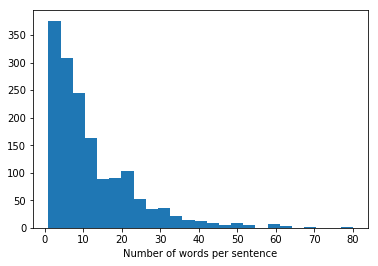

In [42]:
plt.hist(Nwords, bins=25)
plt.xlabel('Number of words per sentence');

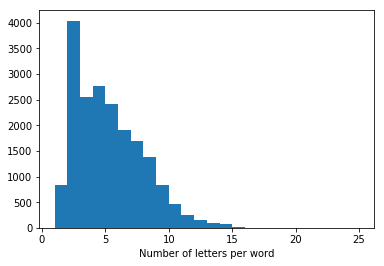

In [43]:
plt.hist(Nletters, bins=range(1, 26))
plt.xlabel('Number of letters per word');

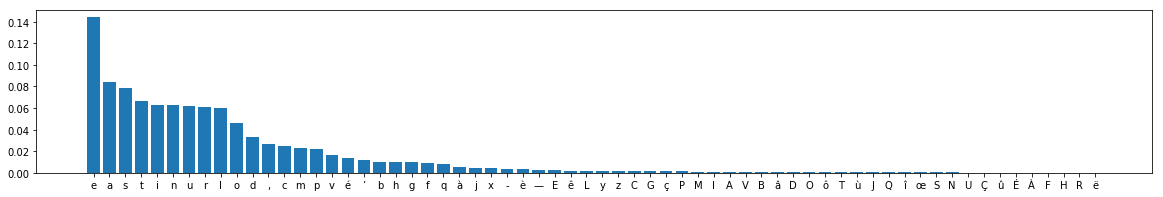

In [44]:
plt.figure(figsize=(20, 3))
frequency = count_letters_frequency(sentences, 10)
plt.bar(x=frequency.keys(), height=frequency.values());

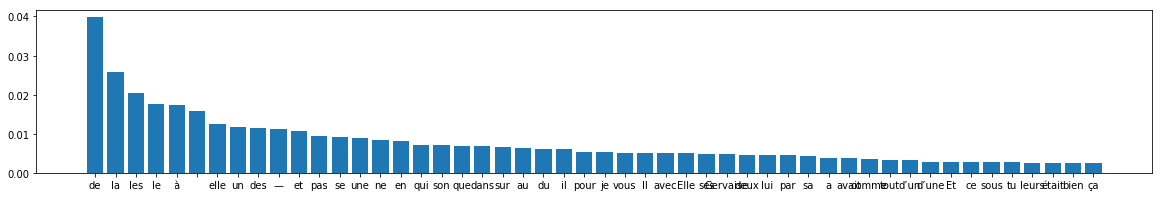

In [50]:
plt.figure(figsize=(20, 3))
frequency = count_words_frequency(sentences)
x, y = list(frequency.keys()), list(frequency.values())
plt.bar(x=x[:50], height=y[:50]);